# Resources covered

- daniel bourke
- learnpytorch.io
- pytorch blogs

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1+cu117


In [2]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
vector = torch.tensor([7, 8])
vector

tensor([7, 8])

In [4]:
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.2525, 0.5900, 0.1220, 0.1529],
        [0.6815, 0.1747, 0.7962, 0.0737],
        [0.7415, 0.8376, 0.4666, 0.9045]])

In [5]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
torch.zeros_like(random_tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [7]:
torch.ones_like(random_tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [8]:
param_tensor = torch.tensor([3,6,9],
                            dtype=torch.float16,
                            requires_grad=True,
                           device='cuda')
param_tensor

tensor([3., 6., 9.], device='cuda:0', dtype=torch.float16, requires_grad=True)

In [9]:
param_tensor.unsqueeze(-1).to('cpu') + random_tensor

tensor([[3.2525, 3.5900, 3.1220, 3.1529],
        [6.6815, 6.1747, 6.7962, 6.0737],
        [9.7415, 9.8376, 9.4666, 9.9045]], grad_fn=<AddBackward0>)

In [10]:
param_tensor.unsqueeze(-1).shape, random_tensor.shape

(torch.Size([3, 1]), torch.Size([3, 4]))

In [11]:
param_tensor.device.type, str(param_tensor.device)

('cuda', 'cuda:0')

In [12]:
e1 = torch.tensor([1,2,3])
e2 = torch.tensor(10).unsqueeze(-1)
e1 + e2, e1.shape, e2.shape

(tensor([11, 12, 13]), torch.Size([3]), torch.Size([1]))

In [13]:
x = torch.arange(0, 100, 10)
min(x), max(x)

(tensor(0), tensor(90))

In [14]:
torch.mean(x.to(dtype=torch.float32))

tensor(45.)

In [15]:
x.type(torch.float32).mean()

tensor(45.)

In [16]:
x.argmax(), x[x.argmax()]

(tensor(9), tensor(90))

In [17]:
x = torch.arange(1., 10.)
x

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [18]:
x_reshaped = x.reshape(3,3)
x_reshaped

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [19]:
torch.all(torch.eq(x_reshaped.squeeze(), x_reshaped))

tensor(True)

In [20]:
z = x.view(1,9)
z[:, 0] = 2
x, z

(tensor([2., 2., 3., 4., 5., 6., 7., 8., 9.]),
 tensor([[2., 2., 3., 4., 5., 6., 7., 8., 9.]]))

In [21]:
torch.stack([x, x],dim=1)

tensor([[2., 2.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.],
        [8., 8.],
        [9., 9.]])

In [22]:
torch.hstack([x,x])

tensor([2., 2., 3., 4., 5., 6., 7., 8., 9., 2., 2., 3., 4., 5., 6., 7., 8., 9.])

In [23]:
torch.vstack([x,x])

tensor([[2., 2., 3., 4., 5., 6., 7., 8., 9.],
        [2., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [24]:
torch.rand([1,2,2,1,2,1])

tensor([[[[[[0.0983],
            [0.3814]]],


          [[[0.2430],
            [0.7898]]]],



         [[[[0.6072],
            [0.8872]]],


          [[[0.8361],
            [0.4979]]]]]])

In [25]:
torch.rand([1,2,2,1,2]).squeeze(), torch.rand([1,2,2,1,2]).squeeze().shape

(tensor([[[0.1391, 0.2854],
          [0.2637, 0.9749]],
 
         [[0.5289, 0.0545],
          [0.3439, 0.1759]]]),
 torch.Size([2, 2, 2]))

In [26]:
torch.rand([1,2,2,1,2]).squeeze(-1), torch.rand([1,2,2,1,2]).squeeze(-1).shape

(tensor([[[[[0.4125, 0.0634]],
 
           [[0.1722, 0.9297]]],
 
 
          [[[0.1226, 0.2692]],
 
           [[0.3580, 0.2153]]]]]),
 torch.Size([1, 2, 2, 1, 2]))

In [27]:
y = torch.arange(1,10).reshape(1,1,3,3)
y

tensor([[[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]])

In [28]:
y[0,0,2,:]

tensor([7, 8, 9])

In [29]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array).type(torch.float32)
tensor

tensor([1., 2., 3., 4., 5., 6., 7.])

In [30]:
tensor.dtype, torch.from_numpy(array).dtype

(torch.float32, torch.float64)

### Workflow

In [31]:
from torch import nn

In [32]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(-1)
y = weight * X + bias

In [33]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [34]:
len(X_test), len(y_test)

(10, 10)

In [35]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float32))

    def forward(self, X):
        return self.weights*X + self.bias

model = LinearRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_calculator = nn.L1Loss()

In [36]:
model.state_dict()

OrderedDict([('weights', tensor([0.3725])), ('bias', tensor([0.4126]))])

In [37]:
epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_calculator(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(X_test)
        loss = loss_calculator(y_test_pred, y_test)
        if epoch%100==0:
            print(f"Epoch: {epoch}, loss: {loss.item()}")

Epoch: 0, loss: 0.17576853930950165
Epoch: 100, loss: 0.06862659752368927
Epoch: 200, loss: 0.007728761527687311
Epoch: 300, loss: 0.007728761527687311
Epoch: 400, loss: 0.007728761527687311
Epoch: 500, loss: 0.007728761527687311
Epoch: 600, loss: 0.007728761527687311
Epoch: 700, loss: 0.007728761527687311
Epoch: 800, loss: 0.007728761527687311
Epoch: 900, loss: 0.007728761527687311


In [38]:
model.state_dict()

OrderedDict([('weights', tensor([0.6945])), ('bias', tensor([0.2991]))])

## Classification

In [39]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)                   

In [40]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [41]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [42]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

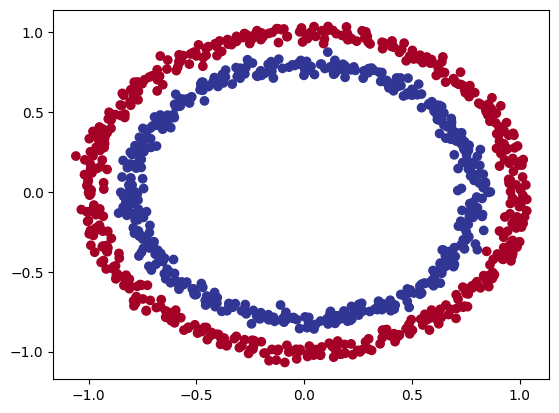

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [44]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [46]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [47]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
model = CircleModelV0().to(device)
model

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [48]:
with torch.inference_mode():
    untrained_preds = model(X_test.to(device))
    print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
    print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.3668],
        [-0.3562],
        [-0.3619],
        [-0.3683],
        [-0.3102],
        [-0.3041],
        [-0.3154],
        [-0.3030],
        [-0.3641],
        [-0.3549]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [49]:
from sklearn.metrics import accuracy_score

loss_calculator = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

epochs = 1000
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_train_pred = torch.round(torch.sigmoid(model(X_train).squeeze(-1)))
    loss = loss_calculator(y_train_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        y_test_pred = torch.round(torch.sigmoid(model(X_test).squeeze(-1)))
        loss = loss_calculator(y_test_pred, y_test)
        if epoch%100==0:
            print(f"Epoch: {epoch}, loss: {loss.item()}, accuracy: {accuracy_score(y_test_pred.cpu().numpy(), y_test.cpu().numpy())*100:.2f}%")

Epoch: 0, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 100, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 200, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 300, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 400, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 500, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 600, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 700, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 800, loss: 0.6931471824645996, accuracy: 50.00%
Epoch: 900, loss: 0.6931471824645996, accuracy: 50.00%


In [50]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = CircleModelV2().to(device)

In [51]:
from sklearn.metrics import accuracy_score

loss_calculator = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

epochs = 1000
for epoch in range(epochs):
    model.train()
    loss = loss_calculator(model(X_train).squeeze(-1), y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        y_test_logits = model(X_test).squeeze(-1)
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))
        loss = loss_calculator(y_test_logits, y_test)
        if epoch%100==0:
            print(f"Epoch: {epoch}, loss: {loss.item()}, accuracy: {accuracy_score(y_test_pred.cpu().numpy(), y_test.cpu().numpy())*100:.2f}%")

Epoch: 0, loss: 0.6963858008384705, accuracy: 50.00%
Epoch: 100, loss: 0.6929262280464172, accuracy: 48.50%
Epoch: 200, loss: 0.6916317343711853, accuracy: 49.00%
Epoch: 300, loss: 0.6904569864273071, accuracy: 49.00%
Epoch: 400, loss: 0.6890853643417358, accuracy: 50.50%
Epoch: 500, loss: 0.6872662901878357, accuracy: 50.50%
Epoch: 600, loss: 0.6841651797294617, accuracy: 51.50%
Epoch: 700, loss: 0.6782902479171753, accuracy: 50.50%
Epoch: 800, loss: 0.6685676574707031, accuracy: 52.50%
Epoch: 900, loss: 0.6528388857841492, accuracy: 62.00%


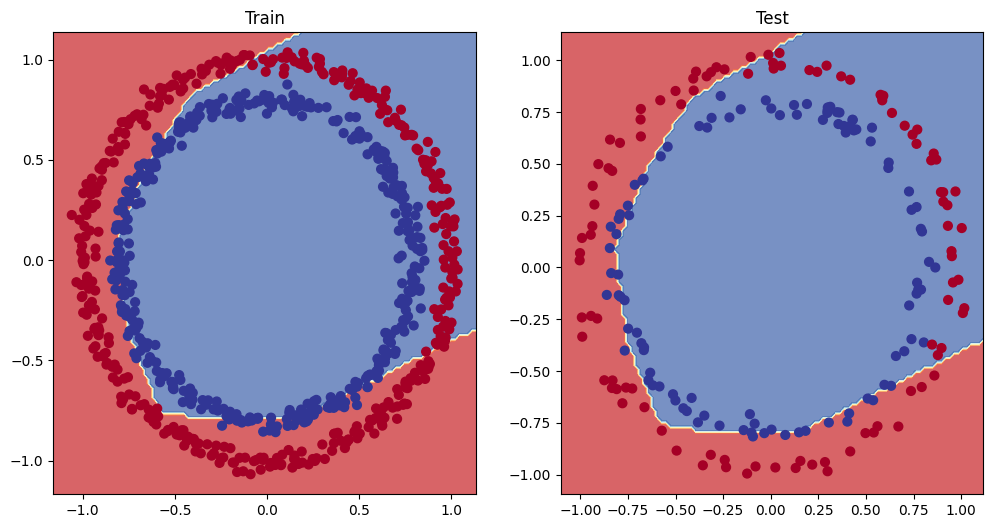

In [52]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test) 

## Multi-class classification

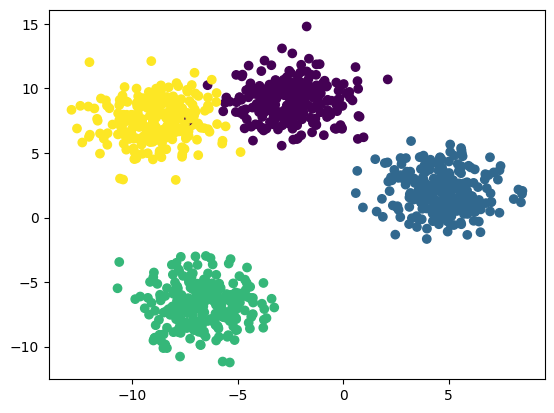

In [53]:
from sklearn.datasets import make_blobs

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.float32)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob);

In [54]:
class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=4)
        self.relu = nn.ReLU()
        
    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = BlobModel().to(device)
model

BlobModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=4, bias=True)
  (relu): ReLU()
)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_blob, 
                                                    y_blob, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [70]:
# loss_calculator = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model.parameters(), 
#                             lr=0.1)

# epochs = 1000
# X_train = X_train.to(device)
# y_train = y_train.to(device)
# X_test = X_test.to(device)
# y_test = y_test.to(device)

# for epoch in range(epochs):
#     model.train()
#     loss = loss_calculator(model(X_train), y_train)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     model.eval()
#     with torch.inference_mode():
#         y_test_pred = torch.round(torch.sigmoid(model(X_test).squeeze(-1)))
#         loss = loss_calculator(y_test_pred, y_test)
#         if epoch%100==0:
#             print(f"Epoch: {epoch}, loss: {loss.item()}, accuracy: {accuracy_score(y_test_pred, y_test)*100:.2f}%")

## Computer Vision